In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('salaries_updated.csv')

In [66]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'Data Scientist'
    elif 'data engineer' in title.lower():
        return 'Data Engineer'
    elif 'analyst' in title.lower():
        return 'Analyst'
    elif 'machine learning' in title.lower() or 'ml' in title.lower():
        return 'ML Engineer'
    elif 'manager' in title.lower():
        return 'Manager'
    elif 'director' in title.lower():
        return 'Director'
    else:
        return 'NA'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'Senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'associate' in title.lower():
        return 'Junior'
    else:
        return 'NA'

In [67]:
df['Job Type'] = df['Job Title'].apply(title_simplifier)
df['Job Type'].value_counts()

Data Scientist    279
NA                182
Data Engineer     119
Analyst           102
ML Engineer        24
Manager            22
Director           14
Name: Job Type, dtype: int64

In [68]:
df['Seniority'] = df['Job Title'].apply(seniority)
df['Seniority'].value_counts()

NA        493
Senior    220
Junior     29
Name: Seniority, dtype: int64

In [69]:
#Fix State from Los Angeles to LA
df['State'] = df['State'].apply(lambda x : x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [70]:
#  Job description length 
df['Desc Length'] = df['Job Description'].apply(lambda x: len(x))
df['Desc Length']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: Desc Length, Length: 742, dtype: int64

In [71]:
df['Competitor Count'] = df['Competitors'].apply(lambda x : len(x.split(',')) if x != '-1' else 0) 

In [72]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Is Hourly', 'Employer provided', 'Min Salary', 'Max Salary',
       'Avg Salary', 'Company Text', 'State', 'Job at HQ', 'Company Age',
       'Python', 'Spark', 'Tableau', 'AWS', 'SQL', 'Job Type', 'Seniority',
       'Desc Length', 'Competitor Count'],
      dtype='object')

In [73]:
df['Min Salary'] = df.apply(lambda x : x['Min Salary']*2 if x['Is Hourly'] == 1 else x['Min Salary'], axis = 1)

In [74]:
df['Max Salary'] = df.apply(lambda x : x['Max Salary']*2 if x['Is Hourly'] == 1 else x['Max Salary'], axis = 1)
df['Avg Salary'] = df.apply(lambda x : x['Avg Salary']*2 if x['Is Hourly'] == 1 else x['Avg Salary'], axis = 1)

In [75]:
df[df['Is Hourly'] ==1][['Avg Salary','Min Salary','Max Salary']]

,Avg Salary,Min Salary,Max Salary
165,41.0,34,48
177,55.0,42,68
197,43.0,36,50
202,55.0,42,68
210,40.0,30,50
246,41.0,34,48
271,55.0,42,68
337,43.0,36,50
345,63.0,48,78
357,55.0,42,68


In [76]:
df['Company Text'] = df['Company Text'].apply(lambda x : x.replace('\n', ''))

In [77]:
df.describe()

,Rating,Founded,Is Hourly,Employer provided,Min Salary,Max Salary,Avg Salary,Job at HQ,Company Age,Python,Spark,Tableau,AWS,SQL,Desc Length,Competitor Count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,101.434636,0.557951,50.322102,0.528302,0.225067,0.199461,0.237197,0.512129,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,37.546122,0.496965,54.026459,0.499535,0.417908,0.399865,0.425651,0.500190,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,28.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,63.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,280.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<AxesSubplot:>

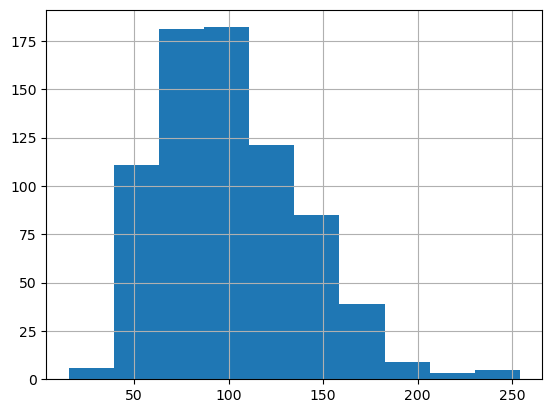

In [78]:
df['Avg Salary'].hist()

<AxesSubplot:>

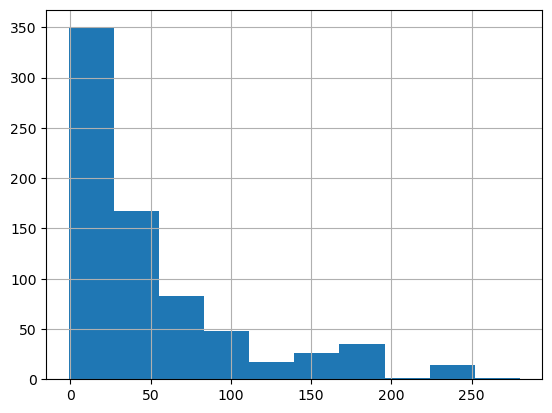

In [79]:
df['Company Age'].hist()

<AxesSubplot:>

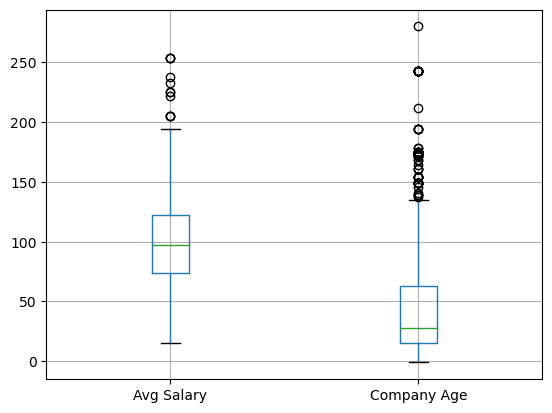

In [80]:
df.boxplot(column = ['Avg Salary', 'Company Age'])

In [81]:
df[['Company Age', 'Avg Salary', 'Rating', 'Desc Length']].corr()

,Company Age,Avg Salary,Rating,Desc Length
Company Age,1.000000,0.021757,0.027660,0.164995
Avg Salary,0.021757,1.000000,0.012517,0.070474
Rating,0.027660,0.012517,1.000000,-0.012281
Desc Length,0.164995,0.070474,-0.012281,1.000000


<AxesSubplot:>

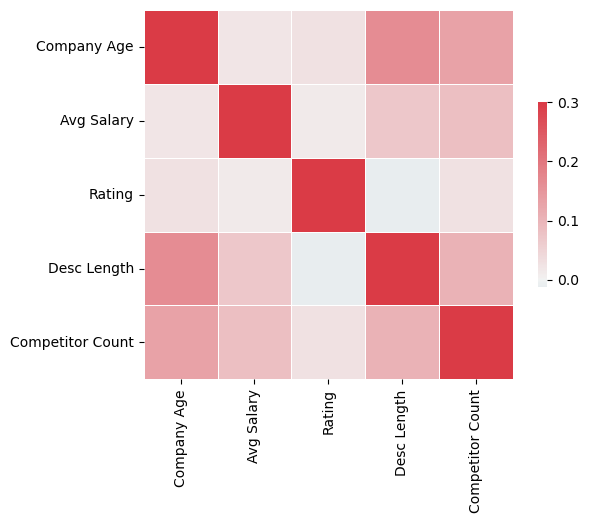

In [82]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Company Age','Avg Salary','Rating','Desc Length','Competitor Count']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [84]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Text', 'State','Job at HQ', 'Python', 'Tableau',
       'Spark', 'AWS', 'SQL', 'Job Type', 'Seniority']]

Graph for Location: total = 200


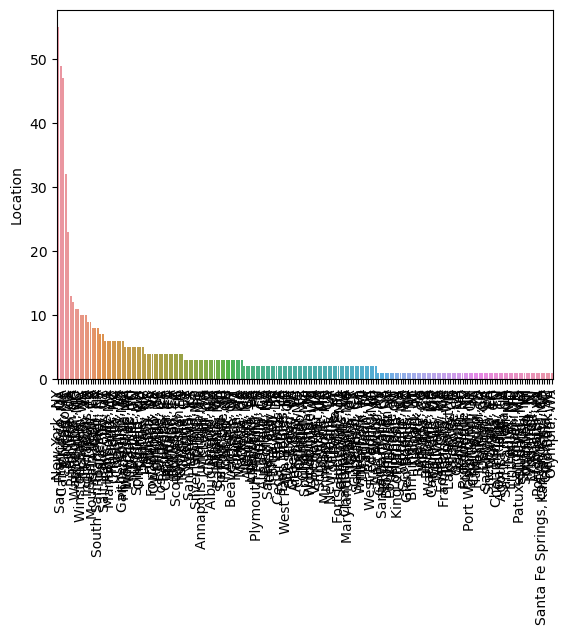

Graph for Headquarters: total = 198


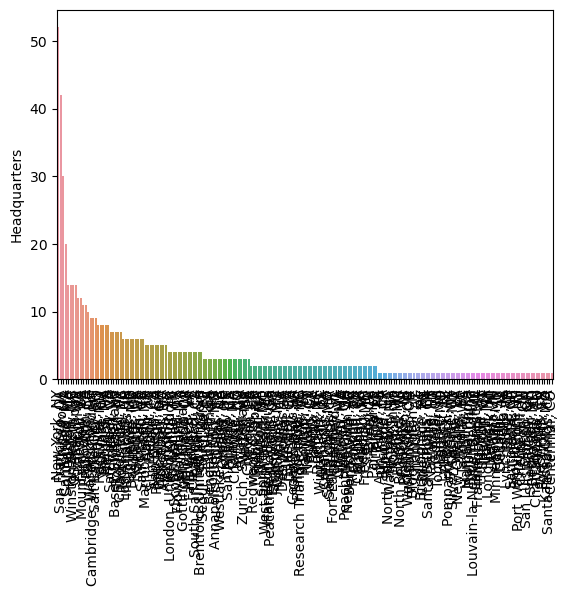

Graph for Size: total = 9


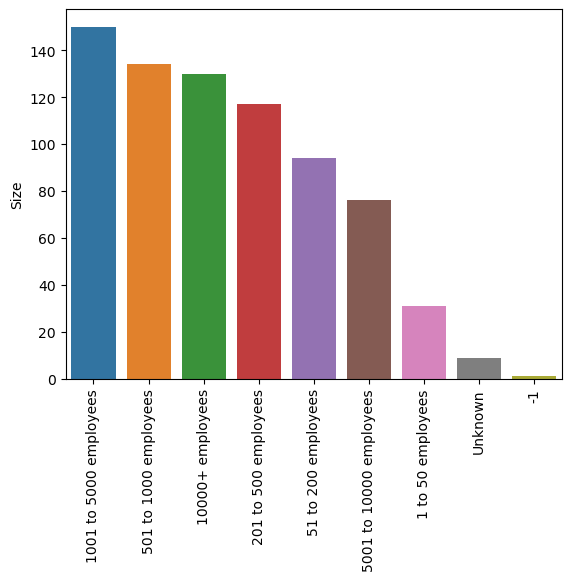

Graph for Type of ownership: total = 11


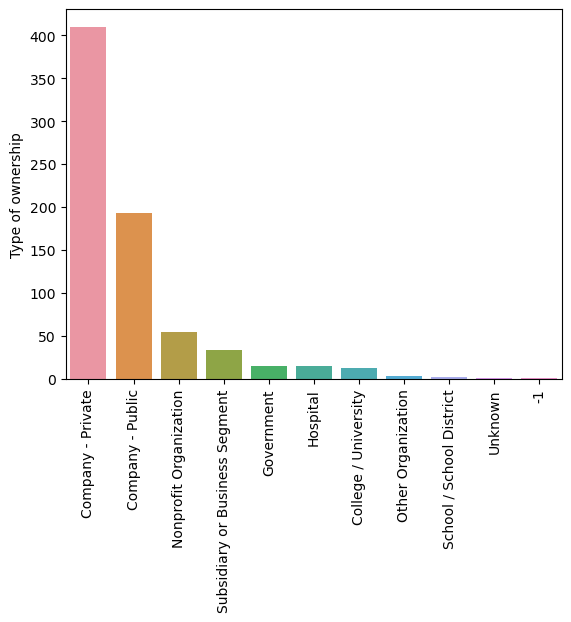

Graph for Industry: total = 60


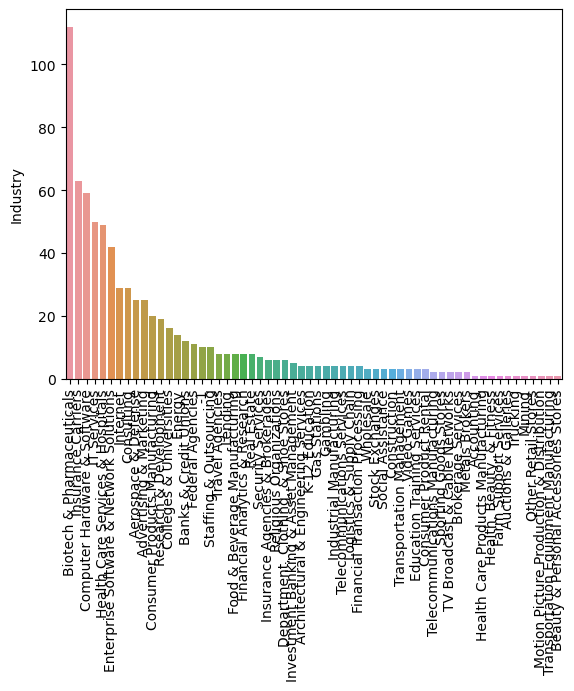

Graph for Sector: total = 25


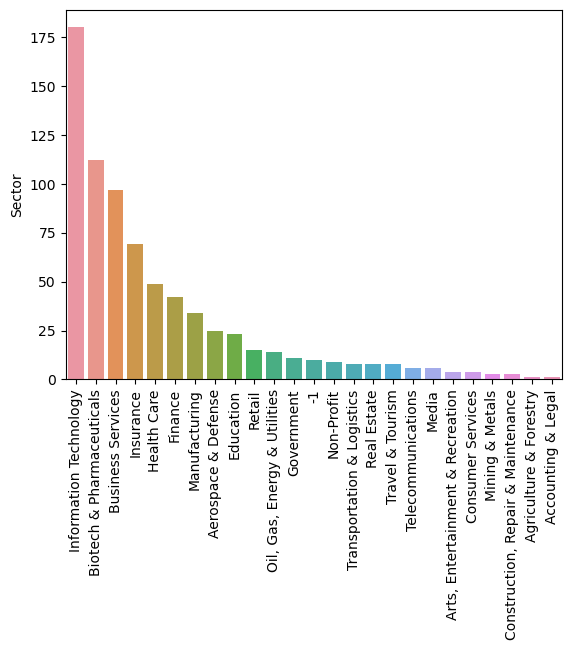

Graph for Revenue: total = 14


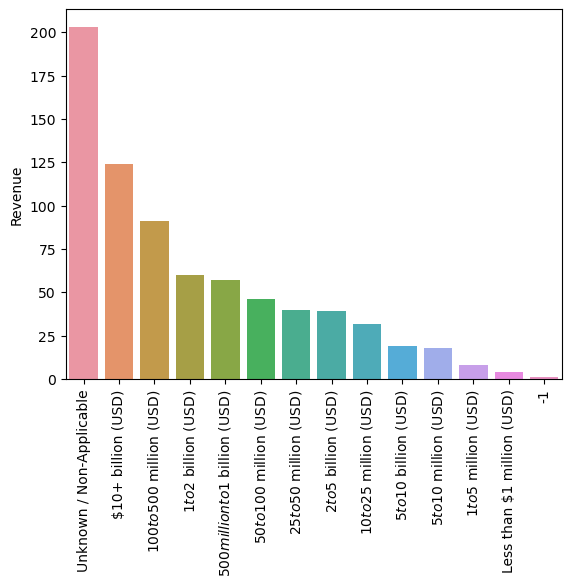

Graph for Company Text: total = 343


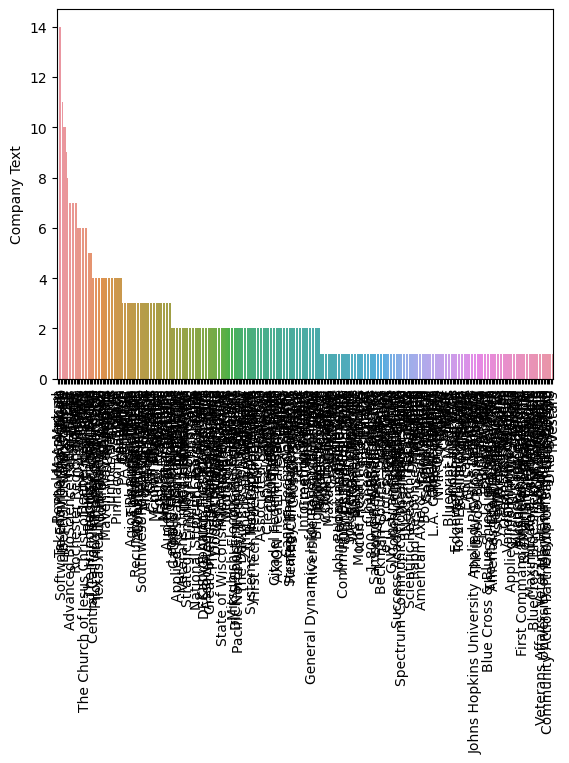

Graph for State: total = 37


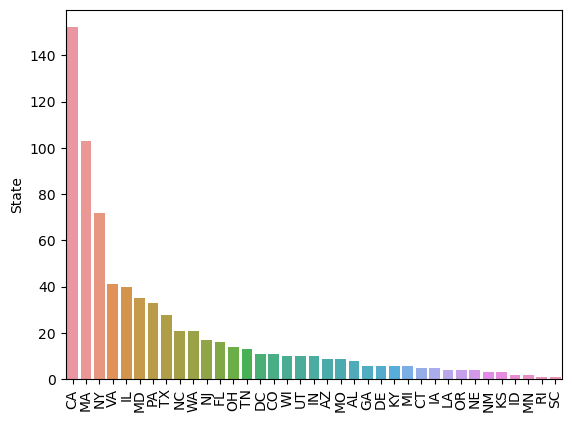

Graph for Job at HQ: total = 2


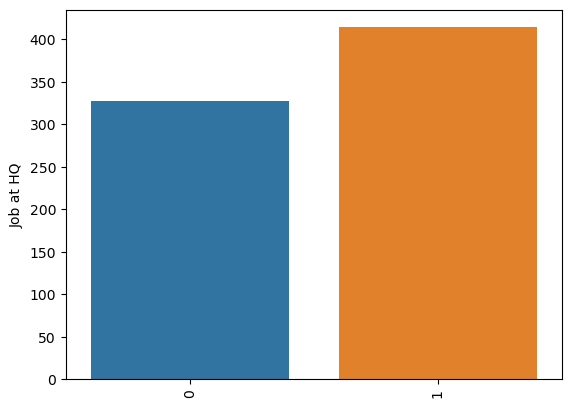

Graph for Python: total = 2


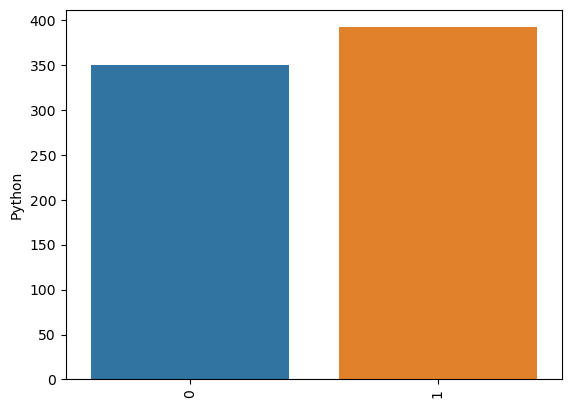

Graph for Tableau: total = 2


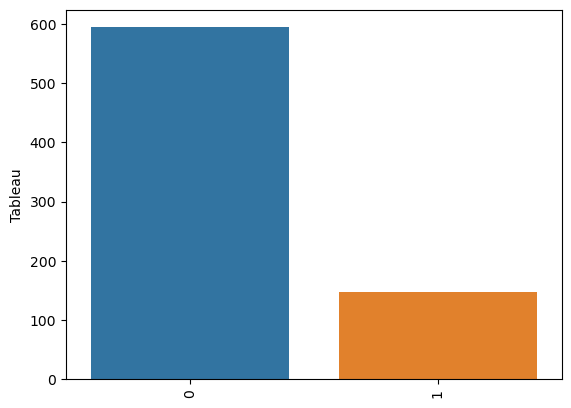

Graph for Spark: total = 2


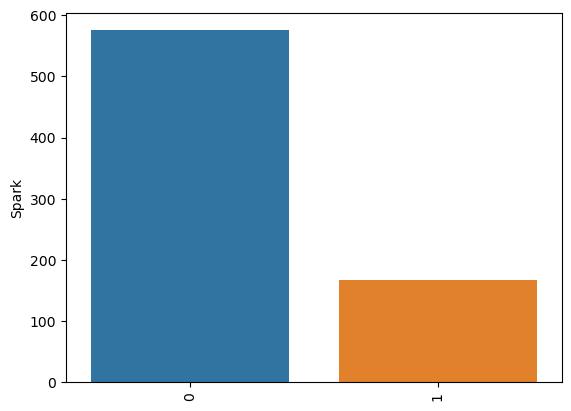

Graph for AWS: total = 2


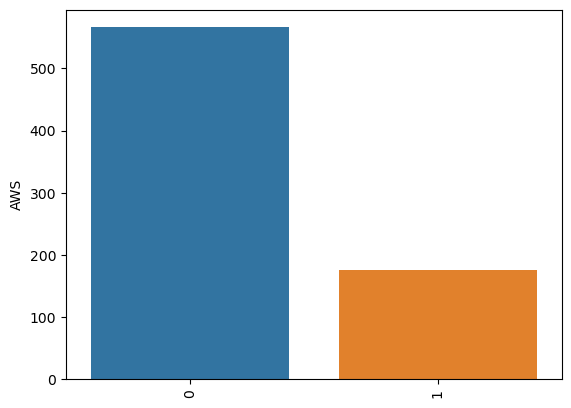

Graph for SQL: total = 2


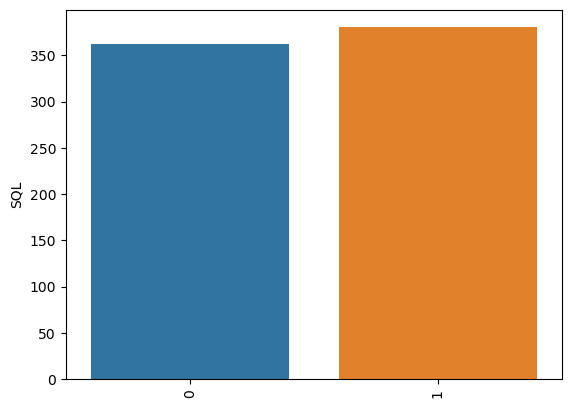

Graph for Job Type: total = 7


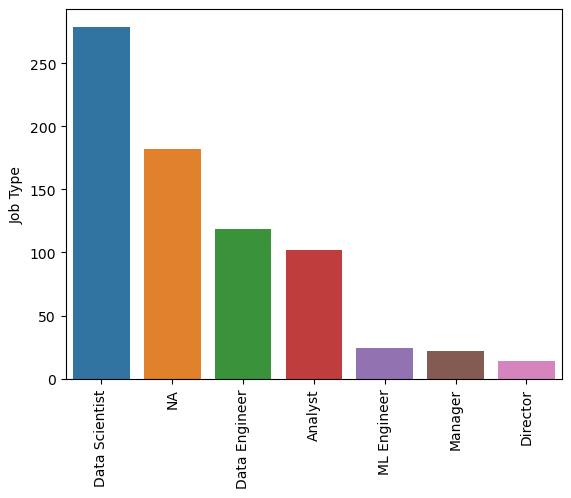

Graph for Seniority: total = 3


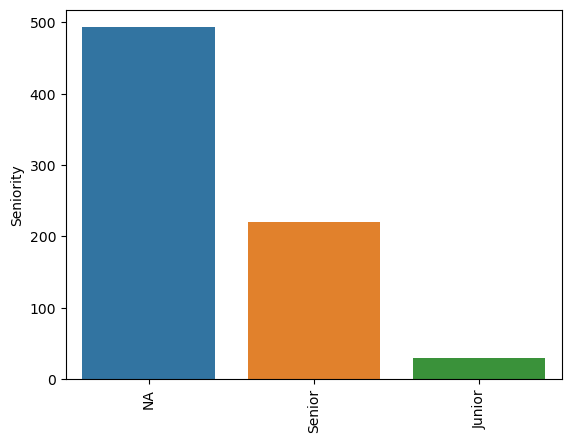

In [86]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


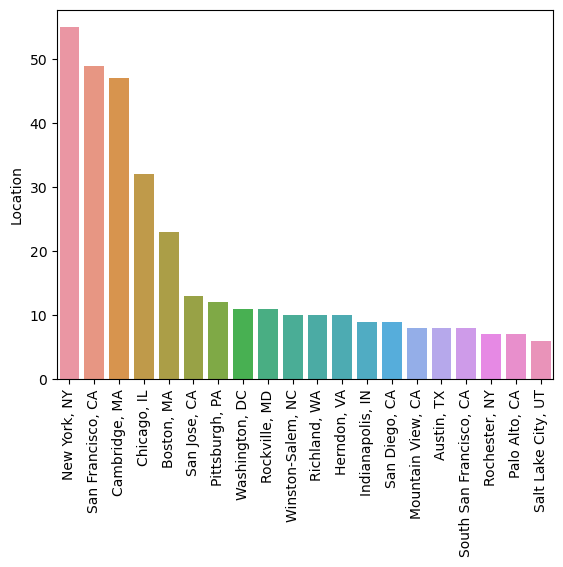

Graph for Headquarters: total = 20


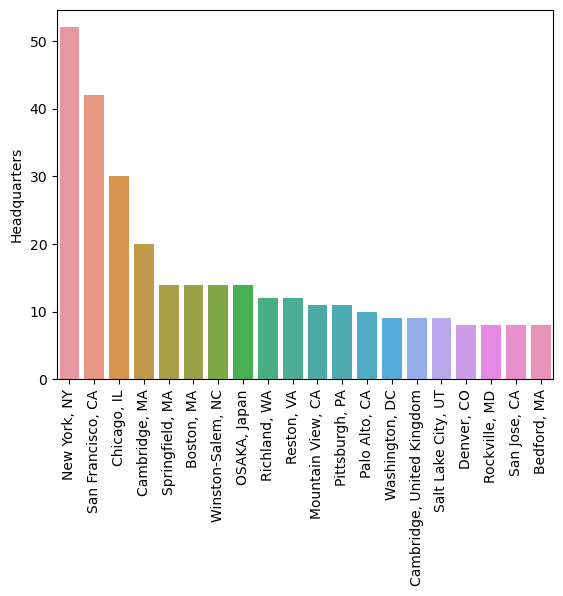

Graph for Company Text: total = 20


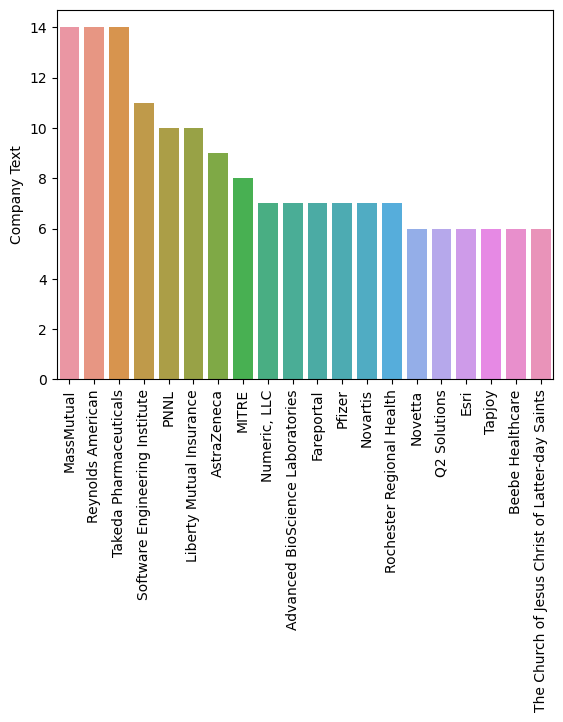

In [87]:
for i in df_cat[['Location','Headquarters','Company Text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [88]:
pd.pivot_table(df, index = 'Job Type', values = 'Avg Salary')

,Avg Salary
Job Type,
Analyst,66.122549
Data Engineer,105.403361
Data Scientist,117.564516
Director,168.607143
ML Engineer,120.062500
Manager,84.022727
NA,88.384615


In [89]:
pd.pivot_table(df, index = ['Job Type', 'Seniority'], values = 'Avg Salary')

Avg Salary
Job Type       Seniority            
Analyst        Junior      47.250000
               NA          62.746269
               Senior      80.092593
Data Engineer  Junior     118.900000
               NA          95.259740
               Senior     124.689189
Data Scientist Junior      84.250000
               NA         107.538251
               Senior     138.956522
Director       Junior     140.000000
               NA         173.375000
ML Engineer    NA         111.000000
               Senior     142.071429
Manager        NA          84.022727
NA             Junior      73.100000
               NA          79.465217
               Senior     109.061404

In [93]:
pd.pivot_table(df, index = 'State', values = 'Avg Salary').sort_values('Avg Salary', ascending = False)[:10]

,Avg Salary
State,
CA,123.513158
IL,116.662500
DC,110.181818
MA,107.412621
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [94]:
pd.pivot_table(df, index = ['State', 'Job Type'], values = 'Avg Salary').sort_values('State', ascending = False)[:10]

Avg Salary
State Job Type                  
WI    NA               54.000000
      Data Scientist  113.500000
      Analyst          58.833333
WA    NA               97.500000
      Data Scientist   99.764706
      Analyst          54.500000
VA    NA               79.300000
      ML Engineer      87.000000
      Data Scientist  108.416667
      Data Engineer    96.900000

In [98]:
pd.set_option('display.max_rows', None)

In [102]:
pd.pivot_table(df, index = ['State','Job Type'], values = 'Avg Salary').sort_values('State', ascending = False)

Avg Salary
State Job Type                  
WI    NA               54.000000
      Data Scientist  113.500000
      Analyst          58.833333
WA    NA               97.500000
      Data Scientist   99.764706
      Analyst          54.500000
VA    NA               79.300000
      ML Engineer      87.000000
      Data Scientist  108.416667
      Data Engineer    96.900000
      Analyst          71.583333
UT    Data Engineer   100.333333
      Analyst          54.750000
      Data Scientist  140.500000
TX    NA               53.571429
      Data Scientist  100.730769
      Data Engineer   113.062500
TN    Data Scientist   96.000000
      Data Engineer   100.950000
      Analyst          27.000000
SC    NA               60.500000
RI    Analyst         100.000000
PA    ML Engineer     120.500000
      Data Engineer    91.500000
      Data Scientist  113.333333
      Analyst          62.750000
      Manager         109.666667
      NA               81.187500
OR    Data Scientist   98.500000
      Data Engineer    73.000000
OH    NA               91.166667
      Data Scientist  105.285714
      Analyst          53.875000
NY    NA               81.583333
      ML Engineer     125.000000
      Data Scientist  115.250000
      Data Engineer    86.375000
      Analyst          65.607143
NM    Data Scientist   74.333333
NJ    Data Scientist  106.875000
      Analyst          83.583333
      Data Engineer   112.000000
      Manager         109.500000
      Director        161.500000
      NA               82.500000
NE    NA               57.000000
      ML Engineer      50.000000
NC    NA               90.916667
      Data Scientist  117.000000
      Data Engineer   104.250000
MO    NA               72.333333
      Manager          40.500000
      Data Scientist  127.666667
      Analyst          61.000000
MN    Data Engineer    95.000000
      Analyst          76.000000
MI    Manager          87.500000
      Data Scientist  106.625000
MD    NA               88.750000
      Data Scientist  109.115385
      Data Engineer   109.000000
      Analyst          80.666667
MA    NA              110.010870
      Manager          71.900000
      Director        117.833333
      Data Scientist  113.750000
      Data Engineer   107.291667
      Analyst          59.125000
LA    Analyst          48.000000
      Data Engineer    70.500000
      NA               40.000000
KY    NA              103.500000
      Data Scientist   84.000000
KS    ML Engineer      87.000000
IN    NA               69.000000
      Data Scientist   84.500000
      Data Engineer   114.500000
IL    Analyst          66.500000
      NA               57.166667
      ML Engineer     133.000000
      Director        221.750000
      Data Scientist  117.233333
      Data Engineer    96.125000
ID    Analyst          56.250000
IA    Analyst          43.000000
      Data Engineer   102.833333
GA    Data Scientist   81.333333
      NA               80.000000
FL    Data Scientist   97.357143
      Data Engineer    91.833333
      Analyst          47.500000
DE    NA               55.000000
DC    Data Scientist  149.000000
      Data Engineer    85.000000
      Analyst          63.500000
CT    NA               62.500000
      Data Scientist   84.000000
CO    ML Engineer     100.500000
      Data Engineer    99.000000
      Analyst          29.500000
      NA               63.000000
      Data Scientist  108.666667
CA    NA               99.907407
      Manager          80.611111
      ML Engineer     177.300000
      Data Scientist  142.522059
      Data Engineer   129.540000
      Analyst          85.250000
AZ    Data Scientist   69.500000
      Data Engineer    79.500000
      Analyst          55.000000
      NA              124.500000
AL    NA               43.750000
      Data Engineer    65.000000
      Analyst          62.200000

In [103]:
pd.pivot_table(df[df['Job Type'] == 'Data Scientist'], index = ['State'], values = 'Avg Salary').sort_values('State', ascending = False)

,Avg Salary
State,
WI,113.500000
WA,99.764706
VA,108.416667
UT,140.500000
TX,100.730769
TN,96.000000
PA,113.333333
OR,98.500000
OH,105.285714


In [108]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Competitor Count', 'Is Hourly', 'Employer provided', 'Python', 'SQL', 'Spark', 'AWS', 'Tableau', 'Type of ownership','Avg Salary']]

In [109]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'Avg Salary').sort_values('Avg Salary', ascending = False))

Rating
        Avg Salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 4.0    107.170213
 3.2    106.928571
 3.7    105.680328
 3.5    104.897959
 4.7    103.983871
 3.3    103.897436
 4.3    102.468750
 4.2    100.442308
 2.2     97.750000
 3.8     97.418033
 4.6     97.250000
 2.1     95.900000
 3.4     93.465909
 3.6     89.945652
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 2.7     85.178571
 2.8     83.928571
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          Avg Salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'Avg Salary' not 1-dimensional

In [110]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'Python', values = 'Avg Salary', aggfunc = 'count')

Python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [115]:
import nltk
nltk.download('punkt')
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nnspa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


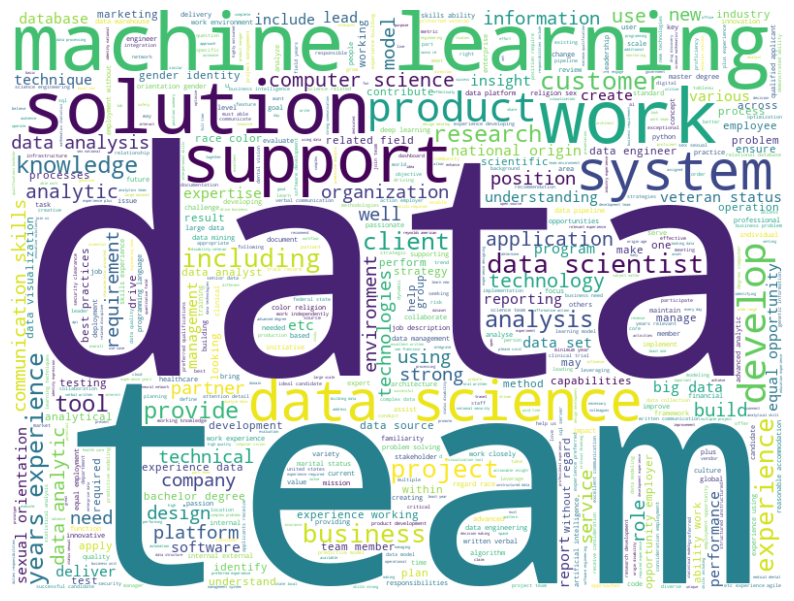

In [119]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 600)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [124]:
df.to_csv('eda_data.csv', index = False)